In [2]:
from __future__ import print_function
__author__ = "Pablo Mandiola, CUSP NYU 2018"

import os
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='DejaVu Sans', font_scale=1.2, rc=None)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Check existence of environmental variable PUIDATA

In [3]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

### Read CSV from NYC Open Data

I chose the 2012 SAT Results dataset. It contains "the most recent school level results for New York City on the SAT. Results are available at the school level for the graduating seniors of 2012. Records contain 2012 College-bound seniors mean SAT scores taken during SY 2012."

As the dataset is a CSV file, I can read it directly with pandas.

In [4]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD')

### Data exploration

Display the top 7 rows of the dataset

In [5]:
df.head(7)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525


Display the last 7 rows of the dataset.

In [6]:
df.tail(7)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
471,75Q811,P.S. Q811,32,429,444,433
472,75R025,SOUTH RICHMOND HIGH SCHOOL I.S./P.S. 25,s,s,s,s
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426
477,79X490,PHOENIX ACADEMY,9,367,370,360


Some rows contain an 's' instead of a score. Let's see the data types.

In [7]:
df.dtypes

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

### Data manipulation

Extract two numerical columns

In [8]:
df_2cols = df.loc[:,['Num of SAT Test Takers', 'SAT Math Avg. Score']]

Convert columns data type to numbers

In [9]:
df_2cols = df_2cols.apply(pd.to_numeric, errors='coerce')

In [10]:
df_2cols.dtypes

Num of SAT Test Takers    float64
SAT Math Avg. Score       float64
dtype: object

Display the reducted dataframe

In [11]:
df_2cols.head(7)

,Num of SAT Test Takers,SAT Math Avg. Score
0,29.0,404.0
1,91.0,423.0
2,70.0,402.0
3,7.0,401.0
4,44.0,433.0
5,112.0,557.0
6,159.0,574.0


### Plot two numeric columns in a scatter plot

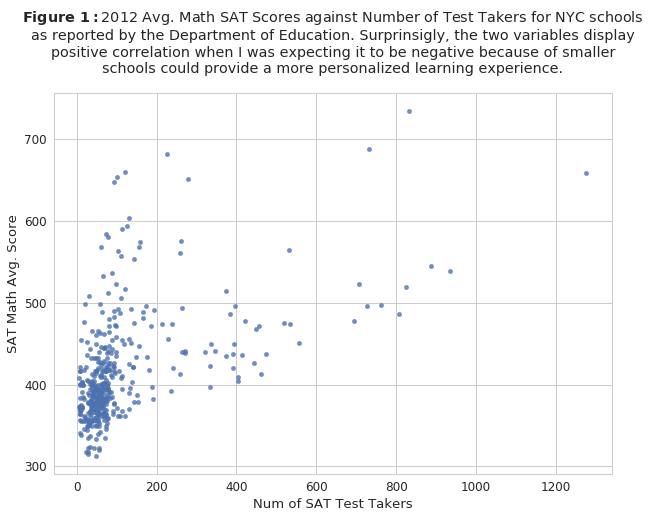

In [51]:
df_2cols.plot.scatter(x="Num of SAT Test Takers", \
              y="SAT Math Avg. Score", \
              figsize=(10,7), \
              title= r"$\bf{Figure\ 1:}$" + "2012 Avg. Math SAT Scores against Number of Test Takers for NYC schools" +
                      "\nas reported by the Department of Education. Surprinsigly, the two variables display" +
                      "\npositive correlation when I was expecting it to be negative because of smaller" +
                      "\nschools could provide a more personalized learning experience." +
                      "\n", \
              alpha=0.8)

### Read data using NYC Open Data API

In [52]:
df_json = pd.read_json("https://data.cityofnewyork.us/resource/734v-jeq5.json")

Display first 8 rows

In [54]:
df_json.head(8)

,dbn,num_of_sat_test_takers,sat_critical_reading_avg_score,sat_math_avg_score,sat_writing_avg_score,school_name
0,01M292,29,355,404,363,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1,01M448,91,383,423,366,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2,01M450,70,377,402,370,EAST SIDE COMMUNITY SCHOOL
3,01M458,7,414,401,359,FORSYTH SATELLITE ACADEMY
4,01M509,44,390,433,384,MARTA VALLE HIGH SCHOOL
5,01M515,112,332,557,316,LOWER EAST SIDE PREPARATORY HIGH SCHOOL
6,01M539,159,522,574,525,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ..."
7,01M650,18,417,418,411,CASCADES HIGH SCHOOL
